In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install --upgrade "ibm-watson>=4.5.0"

     |████████████████████████████████| 378kB 4.7MB/s 
     |████████████████████████████████| 204kB 12.8MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-4.5.0-cp36-none-any.whl size=364301 sha256=bb86d598c8a0e7b1484f90b045acc25eda06dcdff32afd5f69e82af62c4c0882
  Stored in directory: /root/.cache/pip/wheels/71/9a/0a/9b3ca8eca69bc5362eb04709a750b30055a9d27818fd0c9494
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-1.5.1-cp36-none-any.whl size=44491 sha256=ceea5a88177f084d394afbb7fcccbf5f904334afcc8e877189737a746817c902
  Stored in directory: /root/.cache/pip/wheels/6a/42/50/f96888116b329578304f9dda4693cef6f3e76e18272d22cb6c
Successfully built ibm-watson ibm-cloud-sdk-core


In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 4.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=54afb041e8d3adca00a03d6d41e5f5b104c27296cb6322abf0990a3244540d58
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson import ApiException
import json
import os
import pandas as pd
from langdetect import detect
import random
import re
import time
from sklearn.model_selection import train_test_split
import ast
import matplotlib.pyplot as plt

# Raw Data Combination & Preprocessing

In [ ]:
# Read raw datas from the raw data file
path = '/content/drive/My Drive/DS_week8/CSV/'
files = os.listdir(path)

In [ ]:
files

['covid2019_2020-04-26.csv',
 'covid2019_2020-04-27.csv',
 'covid2019_2020-04-28.csv',
 'covid2019_2020-04-29.csv',
 'covid2019_2020-04-30.csv',
 'covid2019_2020-05-01.csv',
 'covid2019_2020-05-02.csv',
 'covid2019_2020-05-03.csv',
 'covid2019_2020-05-04.csv',
 'covid2019_2020-05-05.csv',
 'covid2019_2020-05-06.csv',
 'covid2019_2020-05-07.csv',
 'covid2019_2020-05-08.csv',
 'covid2019_2020-05-09.csv',
 'covid2019_2020-05-10.csv',
 'covid2019_2020-05-11.csv',
 'covid2019_2020-05-12.csv',
 'covid2019_2020-05-13.csv',
 'covid2019_2020-05-14.csv',
 'covid2019_2020-05-15.csv',
 'covid2019_2020-05-16.csv',
 'covid2019_2020-05-17.csv',
 'covid2019_2020-05-18.csv',
 'covid2019_2020-05-19.csv',
 'covid2019_2020-05-20.csv',
 'covid2019_2020-05-21.csv',
 'covid2019_2020-05-22.csv',
 'covid2019_2020-05-23.csv',
 'covid2019_2020-05-24.csv',
 'covid2019_2020-05-25.csv',
 'covid2019_2020-05-26.csv',
 'covid2019_2020-05-27.csv',
 'covid2019_2020-05-28.csv',
 'covid2019_2020-05-29.csv',
 'covid2019_20

In [ ]:
covid_twitter_data = pd.DataFrame()
# Concat the Twitters data into one-table
for file in files:
    data = pd.read_csv(str(path) + file)
    covid_twitter_data = covid_twitter_data.append(data, ignore_index=True)

In [ ]:
# Save the dataset
covid_twitter_data.to_csv('covid2019_0120_0220.csv',index=False)

In [ ]:
# Clean text 
t = time.process_time()
clean_text = []
non_en = []
error = []
index = 0
for item in covid_twitter_data['text']:
    try:
        index = index +1
        # Delete url in text
        item = re.sub('(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]|(\xa0(…)*)))+){1}','',item)
        # Delete @
        item = re.sub('@[a-zA-Z0-9_.-]+','',item)

        try:
            # Detect whether twitter is in English or not 
            if detect(item) == 'en':
                clean_text.append(item)
            else:
                clean_text.append(None)
                non_en.append(index)
        except:
            error.append(index)
            clean_text.append(None)
    except:
        error.append(index)
        clean_text.append(None)

In [ ]:
# Save error tweets 
error_df = pd.DataFrame(error)
non_en_df = pd.DataFrame(non_en)
error_df.to_csv('error_df.csv',index=False)
non_en_df.to_csv('non_en_df.csv',index=False)

In [ ]:
clean_text = pd.DataFrame(clean_text)
clean_text.columns=['clean_text']
data = pd.concat([covid_twitter_data, clean_text], axis=1)
data.to_csv('covid2019_0120_0220_cleans.csv',index=False)
data.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,hashtags/0,links/0,hashtags/1,hashtags/2,reply_to_users/0/screen_name,reply_to_users/0/user_id,img_urls/0,hashtags/3,hashtags/4,hashtags/5,hashtags/6,img_urls/1,img_urls/2,img_urls/3,reply_to_users/1/screen_name,reply_to_users/1/user_id,reply_to_users/2/screen_name,reply_to_users/2/user_id,hashtags/7,hashtags/8,hashtags/9,links/1,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,links/2,links/3,links/4,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,clean_text
0,False,[],[],True,False,0,[],NaN,1.0,[],0.0,firefox_team,Two questions: What if the coronavirus is a na...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-26T23:59:59,1.587946e+09,1.254561e+18,/firefox_team/status/1254560892085248000,1.226489e+18,TeamFirefox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two questions: What if the coronavirus is a na...
1,False,"[""PPPLoan"",""CARESAct"",""COVID19""]",[],False,False,3,"[""https://bit.ly/2Vyqvke""]",NaN,0.0,[],2.0,npquarterly,Here's what's wrong with the Paycheck Protecti...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-26T23:59:59,1.587946e+09,1.254561e+18,/npquarterly/status/1254560891745558528,6.120661e+07,Nonprofit Quarterly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Here's what's wrong with the Paycheck Protecti...
2,True,"[""Covid19""]","[""https://pbs.twimg.com/media/EWkYdckXYAANDKk....",False,False,0,"[""http://midelegacion.mx/LsNoticia?nt=%2FJpZIF...",NaN,0.0,[],0.0,MiDelegacionQro,Decomisan mercancía a 5 comerciantes en Av Pas...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-26T23:59:59,1.587946e+09,1.254561e+18,/MiDelegacionQro/status/1254560890101420034,1.228877e+09,Mi Delegación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,False,[],[],False,False,2,[],NaN,0.0,[],0.0,FlaSouza16,"""Tem que cheirar pro corona vírus não pegar em...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-26T23:59:59,1.587946e+09,1.254561e+18,/FlaSouza16/status/1254560888822136832,1.196956e+18,Godin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,False,[],[],False,False,0,"[""https://www.infotechnology.com/labs/Vacuna-c...",NaN,0.0,[],0.0,albertonovo3,Vacuna contra el coronavirus: dos laboratorios...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-26T23:59:59,1.587946e+09,1.254561e+18,/albertonovo3/status/1254560888759226371,2.834637e+09,alberto novo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
# Drop the row when clean_text is none
data_strip_none = data[data.clean_text.notnull()]
data_strip_none = data_strip_none.set_index(pd.Index(range(0,len(data_strip_none))))

In [ ]:
# random select 2500 samples
random.seed(9001)

data_api, data_test = train_test_split(data_strip_none, test_size=0.2, random_state=0)

# Reset index
data_api = data_api.set_index(pd.Index(range(0,len(data_api))))
data_test = data_test.set_index(pd.Index(range(0,len(data_test))))

# Save the dataset
data_api.to_csv('data_api.csv',index=False)
data_test.to_csv('data_test_0120_0220.csv',index=False)

# IBM Tone Analyzer

In [ ]:
data_api = pd.read_csv('data_api.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_api_12000 = data_api.iloc[9500:12000,]

In [ ]:
data_api_12000.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,hashtags/0,links/0,hashtags/1,hashtags/2,reply_to_users/0/screen_name,reply_to_users/0/user_id,img_urls/0,hashtags/3,hashtags/4,hashtags/5,hashtags/6,img_urls/1,img_urls/2,img_urls/3,reply_to_users/1/screen_name,reply_to_users/1/user_id,reply_to_users/2/screen_name,reply_to_users/2/user_id,hashtags/7,hashtags/8,hashtags/9,links/1,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,links/2,links/3,links/4,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,clean_text
9500,False,NaN,NaN,False,False,0,NaN,NaN,0.0,NaN,0.0,CABSACSB,Coronavirus research updates: Positive coronav...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-06-01T23:48:19,1.591055e+09,1.267604e+18,/CABSACSB/status/1267603916025282560,2.181383e+09,Canadian Association For Biological Safety,NaN,NaN,https://www.nature.com/articles/d41586-020-005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coronavirus research updates: Positive coronav...
9501,True,"[""Coronavirus"",""QuedateEnCasa""]","[""https://pbs.twimg.com/media/EXIWb1dXsAIOj4b....",False,False,1,[],NaN,0.0,[],0.0,MERCEDESG1962,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-03T23:37:24,1.588549e+09,1.257092e+18,/MERCEDESG1962/status/1257091921178132483,2.349252e+09,Maria Mercedes G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...
9502,False,"[""dating"",""coronavirus"",""pandemichttps""]",[],False,False,4,"[""https://twitter.com/cgtnamerica/status/12555...",NaN,0.0,[],3.0,nicthegem,Great story about dating amid the coronavirus ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-29T23:58:01,1.588205e+09,1.255648e+18,/nicthegem/status/1255647557948235776,1.054748e+18,Nic Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great story about dating amid the coronavirus ...
9503,True,[],"[""https://pbs.twimg.com/media/EXDNhkGX0AAvwnu....",False,False,0,"[""https://www.gbajumobase.com.ng/breaking-220-...",NaN,0.0,[],0.0,Gbajumobasemed1,BREAKING!!! 220 New Coronavirus Cases Confirme...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:40:20,1.588463e+09,1.256730e+18,/Gbajumobasemed1/status/1256730274316107777,1.234889e+18,Gbajumobasemedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BREAKING!!! 220 New Coronavirus Cases Confirme...
9504,False,[],[],False,False,0,[],NaN,0.0,[],0.0,JackEO_Robinson,The US is about to have another huge spike in ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:55:37,1.588464e+09,1.256734e+18,/JackEO_Robinson/status/1256734119398199296,5.049755e+08,Jack E. O. Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The US is about to have another huge spike in ...


In [ ]:
authenticator = IAMAuthenticator('HrHp-Irh0DjduZoNE6FIZNvWvN-BIp5lt6gpKrQjmnZk')
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.eu-de.tone-analyzer.watson.cloud.ibm.com/instances/799fc4c9-66be-4e89-a5fd-c2317e8e28f3')
tone_analyzer.set_disable_ssl_verification(False)

In [ ]:
tones = []
index = 0
for item in data_api_12000['clean_text']:
    try:
        index = index + 1
        text = item
        tone_analysis = tone_analyzer.tone({'text': text}, content_type='application/json').get_result()
        tones.append(tone_analysis)
    except ApiException as ex:
        tones.append(None)
        print ("Method failed with status code " + str(ex.code) + ": " + ex.message)

In [ ]:
tones_copy = tones.copy()
tones_copy = pd.DataFrame(tones_copy)

In [ ]:
tones_copy.head()

,document_tone,sentences_tone
0,"{'tones': [{'score': 0.627069, 'tone_id': 'joy...",NaN
1,{'tones': []},"[{'sentence_id': 0, 'text': '#Coronavirus', 't..."
2,"{'tones': [{'score': 0.533468, 'tone_id': 'joy...",NaN
3,"{'tones': [{'score': 0.514836, 'tone_id': 'joy...",NaN
4,{'tones': []},NaN


In [ ]:
data_api_12000 = data_api_12000.reset_index()

In [ ]:
data_api_12000 = data_api_12000.drop(['index'], axis=1)

In [ ]:
data_api_12000 = pd.concat([data_api_12000,tones_copy],axis=1)
data_api_12000.to_csv('data_api_12000.csv',index=False)

# Formating the document tones

In [ ]:
data = pd.read_csv('data_api_12000.csv')

In [ ]:
data.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,hashtags/0,links/0,hashtags/1,hashtags/2,reply_to_users/0/screen_name,reply_to_users/0/user_id,img_urls/0,hashtags/3,hashtags/4,hashtags/5,hashtags/6,img_urls/1,img_urls/2,img_urls/3,reply_to_users/1/screen_name,reply_to_users/1/user_id,reply_to_users/2/screen_name,reply_to_users/2/user_id,hashtags/7,hashtags/8,hashtags/9,links/1,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,links/2,links/3,links/4,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,clean_text,document_tone,sentences_tone
0,False,NaN,NaN,False,False,0,NaN,NaN,0.0,NaN,0.0,CABSACSB,Coronavirus research updates: Positive coronav...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-06-01T23:48:19,1.591055e+09,1.267604e+18,/CABSACSB/status/1267603916025282560,2.181383e+09,Canadian Association For Biological Safety,NaN,NaN,https://www.nature.com/articles/d41586-020-005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coronavirus research updates: Positive coronav...,"{'tones': [{'score': 0.627069, 'tone_id': 'joy...",NaN
1,True,"[""Coronavirus"",""QuedateEnCasa""]","[""https://pbs.twimg.com/media/EXIWb1dXsAIOj4b....",False,False,1,[],NaN,0.0,[],0.0,MERCEDESG1962,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-03T23:37:24,1.588549e+09,1.257092e+18,/MERCEDESG1962/status/1257091921178132483,2.349252e+09,Maria Mercedes G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...,{'tones': []},"[{'sentence_id': 0, 'text': '#Coronavirus', 't..."
2,False,"[""dating"",""coronavirus"",""pandemichttps""]",[],False,False,4,"[""https://twitter.com/cgtnamerica/status/12555...",NaN,0.0,[],3.0,nicthegem,Great story about dating amid the coronavirus ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-29T23:58:01,1.588205e+09,1.255648e+18,/nicthegem/status/1255647557948235776,1.054748e+18,Nic Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great story about dating amid the coronavirus ...,"{'tones': [{'score': 0.533468, 'tone_id': 'joy...",NaN
3,True,[],"[""https://pbs.twimg.com/media/EXDNhkGX0AAvwnu....",False,False,0,"[""https://www.gbajumobase.com.ng/breaking-220-...",NaN,0.0,[],0.0,Gbajumobasemed1,BREAKING!!! 220 New Coronavirus Cases Confirme...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:40:20,1.588463e+09,1.256730e+18,/Gbajumobasemed1/status/1256730274316107777,1.234889e+18,Gbajumobasemedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BREAKING!!! 220 New Coronavirus Cases Confirme...,"{'tones': [{'score': 0.514836, 'tone_id': 'joy...",NaN
4,False,[],[],False,False,0,[],NaN,0.0,[],0.0,JackEO_Robinson,The US is about to have another huge spike in ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:55:37,1.588464e+09,1.256734e+18,/JackEO_Robinson/status/1256734119398199296,5.049755e+08,Jack E. O. Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The US is about to have another huge spike in ...,

In [ ]:
data['document_tones'] = data.document_tone.apply(lambda x: ast.literal_eval(x)['tones'])
data.drop('document_tone',axis = 1,inplace = True)

In [ ]:
# split sentiments in corresponding columns
for i in range(0, len(data)):
    for j in range(0, len(data.loc[i, 'document_tones'])):
        dic = data.loc[i, 'document_tones'][j]
        source = dic['tone_id']
        data.loc[i, source] = 1
data.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,hashtags/0,links/0,hashtags/1,hashtags/2,reply_to_users/0/screen_name,reply_to_users/0/user_id,img_urls/0,hashtags/3,hashtags/4,hashtags/5,hashtags/6,img_urls/1,img_urls/2,img_urls/3,reply_to_users/1/screen_name,reply_to_users/1/user_id,reply_to_users/2/screen_name,reply_to_users/2/user_id,hashtags/7,hashtags/8,hashtags/9,links/1,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,links/2,links/3,links/4,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,clean_text,sentences_tone,document_tones,joy,confident,analytical,sadness,tentative,fear,anger
0,False,NaN,NaN,False,False,0,NaN,NaN,0.0,NaN,0.0,CABSACSB,Coronavirus research updates: Positive coronav...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-06-01T23:48:19,1.591055e+09,1.267604e+18,/CABSACSB/status/1267603916025282560,2.181383e+09,Canadian Association For Biological Safety,NaN,NaN,https://www.nature.com/articles/d41586-020-005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coronavirus research updates: Positive coronav...,NaN,"[{'score': 0.627069, 'tone_id': 'joy', 'tone_n...",1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,True,"[""Coronavirus"",""QuedateEnCasa""]","[""https://pbs.twimg.com/media/EXIWb1dXsAIOj4b....",False,False,1,[],NaN,0.0,[],0.0,MERCEDESG1962,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-03T23:37:24,1.588549e+09,1.257092e+18,/MERCEDESG1962/status/1257091921178132483,2.349252e+09,Maria Mercedes G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#Coronavirus\n#QuedateEnCasa \nLA PLATA.pic.tw...,"[{'sentence_id': 0, 'text': '#Coronavirus', 't...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,"[""dating"",""coronavirus"",""pandemichttps""]",[],False,False,4,"[""https://twitter.com/cgtnamerica/status/12555...",NaN,0.0,[],3.0,nicthegem,Great story about dating amid the coronavirus ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-29T23:58:01,1.588205e+09,1.255648e+18,/nicthegem/status/1255647557948235776,1.054748e+18,Nic Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great story about dating amid the coronavirus ...,NaN,"[{'score': 0.533468, 'tone_id': 'joy', 'tone_n...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,True,[],"[""https://pbs.twimg.com/media/EXDNhkGX0AAvwnu....",False,False,0,"[""https://www.gbajumobase.com.ng/breaking-220-...",NaN,0.0,[],0.0,Gbajumobasemed1,BREAKING!!! 220 New Coronavirus Cases Confirme...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:40:20,1.588463e+09,1.256730e+18,/Gbajumobasemed1/status/1256730274316107777,1.234889e+18,Gbajumobasemedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BREAKING!!! 220 New Coronavirus Cases Confirme...,NaN,"[{'score': 0.514836, 'tone_id': 'joy', 'tone_n...",1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,False,[],[],False,False,0,[],NaN,0.0,[],0.0,JackEO_Robinson,The US is about to have another huge spike in ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-02T23:55:37,1.588464e+09,1.256734e+18,/JackEO_Robinson/status/1256734119398199296,5.049755e+08,Jack E. O. Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
data.to_csv('sentiment_12000.csv',index=False)

In [ ]:
covid_twitter_data = pd.read_csv('/content/sentiment_12000.csv',encoding='utf-8')

In [ ]:
covid_twitter_data['analytical'].sum()

801.0

In [ ]:
emotions_total = pd.DataFrame(covid_twitter_data,columns=['tentative','analytical','sadness','confident','joy','anger','fear'])
sum_column = emotions_total.sum(axis=0)
print (sum_column)

tentative     562.0
analytical    801.0
sadness       402.0
confident     331.0
joy           362.0
anger         123.0
fear          106.0
dtype: float64


In [ ]:
emotions_list=['tentative','analytical','sadness','confident','joy','anger','fear']

In [ ]:
covid_twitter_data['timestamp']= pd.to_datetime(covid_twitter_data['timestamp']) 

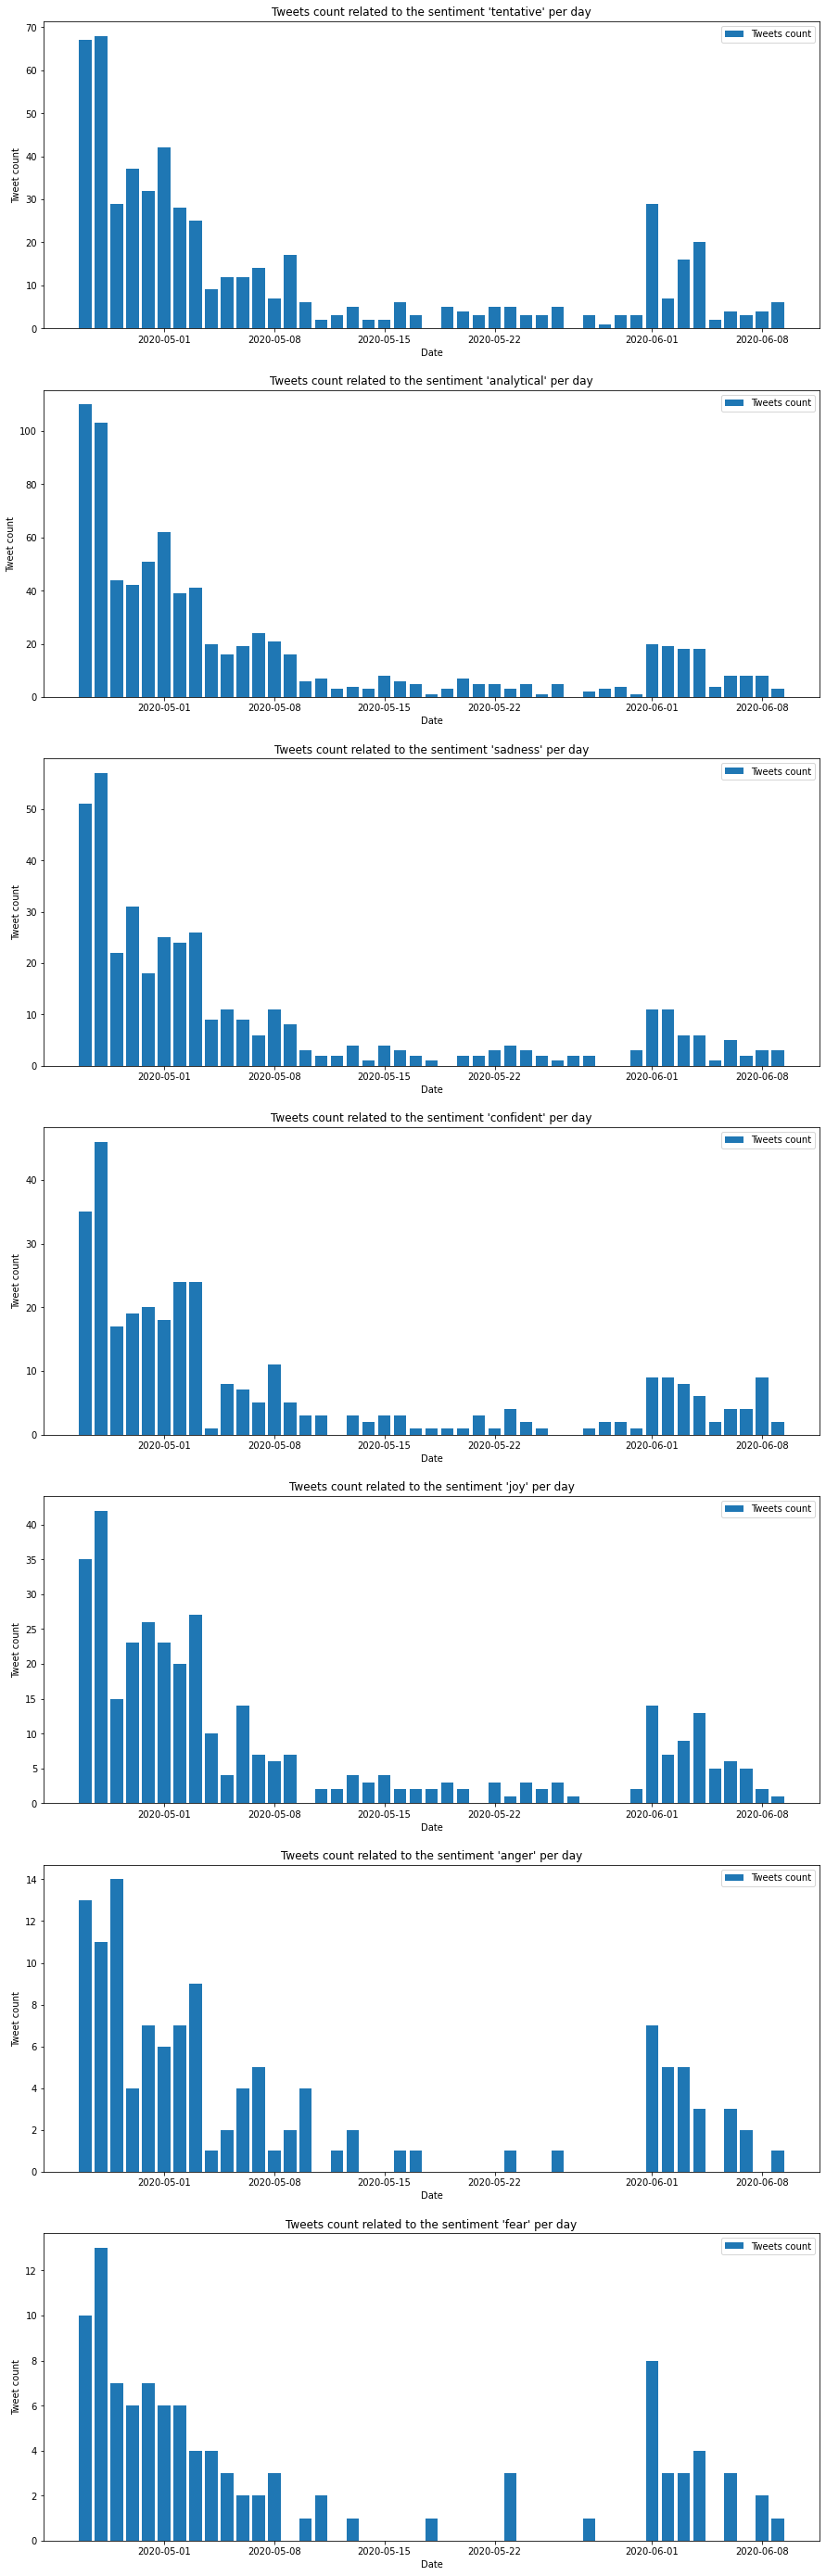

In [ ]:
fig, axs = plt.subplots(7,figsize=(15,50))
index=0
for emotion in emotions_list:
    dataFrame=covid_twitter_data[covid_twitter_data[emotion] ==1]
    dataFrame = dataFrame.groupby(dataFrame['timestamp'].dt.date).size().reset_index(name='Count')
    axs[index].bar(dataFrame.timestamp.values, dataFrame.Count.values,label='Tweets count')
    axs[index].set(xlabel='Date', ylabel='Tweet count',title="Tweets count related to the sentiment '"+emotion+"' per day")
    axs[index].legend()
    index+=1
plt.show()